# HW 1 - Simon Lidwell

## Task 3 - EDA
### Read In Data From File

In [203]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Make our imports to get everything that we're going to need for this first part here

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# read in our data from the clean data folder
classification_df = pd.read_csv("data/kc_house_data_classification.csv")

Print out the head() of our classification_df to see what kind of data we are working with

In [205]:
classification_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


Print out the info() from our classification_df just for some extra data ingestion

In [206]:
classification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

### Do some Automated EDA Using Sweetviz

In [207]:
import sweetviz
import tqdm as notebook_tqdm

Sweetviz threw a warning saying to import tqdm as notebook_tqdm and then the warning went away

In [208]:
report = sweetviz.analyze(classification_df)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


I had a weird error where it said numpy didn't contain warnings, so I saw on Stack that I needed to downgrade my numpy version... Which lead to an error saying that my python version was too new to downgrade to 1.23.1  which is what worked for other people. However, I had a previous version of python installed outside of the aap virtual env, so I just pip installed what was needed and then went from there...

In [209]:
report.show_html("output/sweetviz_report.html")

Report output/sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Some more "Manual" EDA

Lets check out how many 0s and 1s are even in our classification_df...

In [210]:
classification_df.groupby(['price_gt_1M']).size()

price_gt_1M
0    20121
1     1492
dtype: int64

So there are 1492 houses over $1 million in this data set and 20121 houses under $1 million

In [211]:
classification_df['price_gt_1M'].value_counts(normalize=True)

0    0.930967
1    0.069033
Name: price_gt_1M, dtype: float64

a house that is over $1 million appears in 6.9% of the data, while the other 93.1% of the data is all houses below $1 million

## Task 4 - Categorize Feature Types

Convert columns that are categorical to list, I got the columns from my sweetviz report and then I use list comprehension to filter them out from the numeric columns

In [212]:
category_list = [
    "floors"
    , "waterfront"
    , "view"
    , "condition"
]

numeric_list = [k for k in classification_df if k not in category_list and k != 'price_gt_1M']

print(numeric_list)

print(category_list)

all_cols = classification_df.columns.tolist()

print(all_cols)

classification_df.info()

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
['floors', 'waterfront', 'view', 'condition']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_gt_1M']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-nul

Get index positions of columns for later

In [213]:
cat_cols_idx = [classification_df.columns.get_loc(c) for c in category_list]
num_cols_idx = [classification_df.columns.get_loc(c) for c in numeric_list]

print(cat_cols_idx)
print(num_cols_idx)

[4, 5, 6, 7]
[0, 1, 2, 3, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


## Task 4 - Logistic Regression Models

### Task 4 Pre-Work

Here I'm doing things like setting up the preprocessing and doing all the sklearn imports that we are going to need to do this assignment

In [214]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [215]:
numeric_transformer = StandardScaler()

In [216]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

Since these two transformers make up the steps we need to take in preprocessing, lets pass them into `ColumnTransformer()`

In [217]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols_idx),
        ('cat', categorical_transformer, cat_cols_idx)
    ]
)

Create our classifier model -- Logistic Regression

In [218]:
clf_model = LogisticRegression(C=1, penalty='l2', solver='saga', max_iter=500)

In [219]:
# Now we need to append our classifier to the preprocessing pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', clf_model)
]
)

In [220]:
# generate a little picture of the pipeline
from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  [0, 1, 2, 3, 8, 9, 10, 11, 12,
                                                   13, 14, 15, 16, 17]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [4, 5, 6, 7])])),
                ('classifier',
                 LogisticRegression(C=1, max_iter=500, solver='saga'))])

The above is pretty cool, visually see our 'pipeline' that we have constructed

In [221]:
# this is just something I stole from a screencast in the pump it up project
# not sure if I'm actually going to need this or not
x = classification_df.iloc[:, 0:18]
y = classification_df.iloc[:, 18]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=14)

Stochastic gradient descent - this is the optimization algorithm being used so we get that convergence warning after doing `clf.fit(X_train, y_train)`

In [222]:
# fit model on new training data
clf.fit(X_train, y_train)

c:\Users\slidw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  [0, 1, 2, 3, 8, 9, 10, 11, 12,
                                                   13, 14, 15, 16, 17]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [4, 5, 6, 7])])),
                ('classifier',
                 LogisticRegression(C=1, max_iter=500, solver='saga'))])

In [223]:
print("Training score : %.3f" % clf.score(X_train, y_train))
print("Test score : %.3f" % clf.score(X_test, y_test))

Training score : 0.963
Test score : 0.957


We are getting a score of 0.957 on the test data...

Lets try the Lasso Penalty with C = 0.001

In [224]:
clf_model_l1_C001 = LogisticRegression(penalty='l1', C=0.001, solver='saga', max_iter=500)

clf_l1_C001 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', clf_model)])

clf_l1_C001.fit(X_train, y_train)

print("Training score : %.3f" % clf_l1_C001.score(X_train, y_train))
print("Test score : %.3f" % clf_l1_C001.score(X_test, y_test))

Training score : 0.963
Test score : 0.957


c:\Users\slidw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Again, we got the same values... something doesn't seem correct but I'm not sure what it is

### Lets get more into the assignment here with Model 0: The Null Model

DummyClassifier makes predictions that ignore the input features.

This classifier serves as a simple baseline to compare against other more complex classifiers.

In [225]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")

# fit dummy model on training data
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [226]:
dummy_clf.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [227]:
dummy_clf.score(X_train, y_train)

0.9331405436668595

#### Model 1: Ridge regression with C=1.0

Here we create our l2 regularization model. Ridge regression is a model tuning method that is used to analyze any data that suffers from multicollinearity. This method performs l2 regularization so we fit it with that penalty

In [248]:
clf_model_C01 = LogisticRegression(penalty='l2', C=1.0, solver='saga', max_iter=2000)

clf_C01 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', clf_model_C01)])

clf_C01.fit(X_train, y_train)

print("Training score : %.3f" % clf_C01.score(X_train, y_train))
print("Test score : %.3f" % clf_C01.score(X_test, y_test))

Training score : 0.963
Test score : 0.957


Now lets create our confusion matrix... we're going to steal sklearns metrics method

In [359]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Have to import the metrics method from sklearn in order to create the confusion matrix from our model

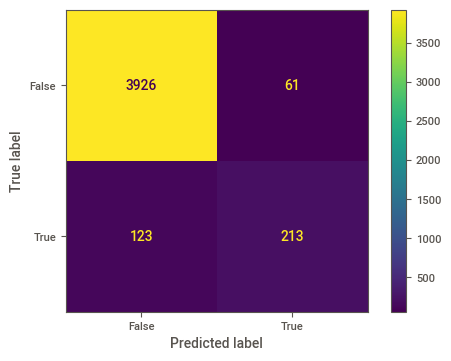

In [360]:
from sklearn import metrics

y_pred = clf_C01.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

cm_display.plot()

plt.show()

Now we need to plot our coefficients, where this was a little tricky because the `coef_plot` function needed to be changed around...

In [361]:
clf_C01.named_steps['classifier'].coef_.shape

(1, 32)

I basically just took out the parts where it iterated throught the steps, since the df.shape only returned a single-valued list of coefficients

In [362]:
def coef_plot(model, title=None):
    if title:
        plt.title(title)
    plt.plot(model.steps[1][1].coef_[0])

Now lets use our function to plot our coefficients from this Ridge Regression Model and see what we get...

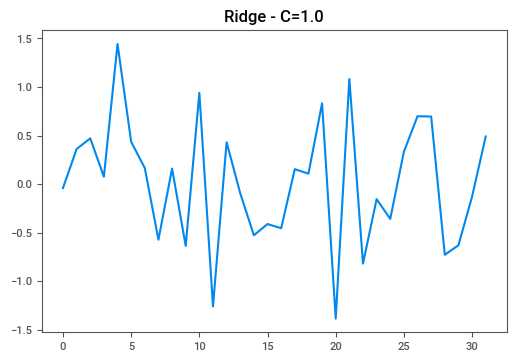

In [363]:
coef_plot(clf_C01, 'Ridge - C=1.0')

Being the first regression model, this one seems decently accurate but increasing our 'regularization' will hopefully help fine tune our model

#### Model 2: Lasso regression with C=1.0

Basically just copy and paste the code from our last model but change the penalty to 'l1'

In [364]:
clf_model2_C001 = LogisticRegression(penalty='l1', C=1.0, solver='saga', max_iter=2000)

clf_C001 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', clf_model2_C001)])

clf_C001.fit(X_train, y_train)

print("Training score : %.3f" % clf_C001.score(X_train, y_train))
print("Test score : %.3f" % clf_C001.score(X_test, y_test))

Training score : 0.963
Test score : 0.958


We see that our test score is now .001 higher than the ridge regression model at C=1.0

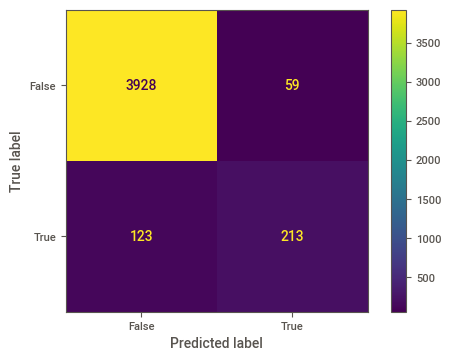

In [365]:
y_pred = clf_C001.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

cm_display.plot()

plt.show()

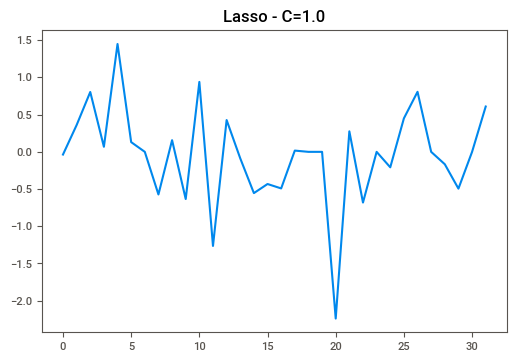

In [366]:
coef_plot(clf_C001, 'Lasso - C=1.0')

Create the same outputs and compare the performance to the ridge regression model.

#### Model 3: Lasso regression with C=0.01

Fit another lasso regression but use `C=0.01`. Does this enforce more or less regularization? Create the same outputs and compare the performance to the first two models. Discuss why the plot looks so different than the previous plots.

In [367]:
clf_model3_C0001 = LogisticRegression(penalty='l1', C=0.01, solver='saga', max_iter=2000)

clf_C0001 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', clf_model3_C0001)])

clf_C0001.fit(X_train, y_train)

print("Training score : %.3f" % clf_C0001.score(X_train, y_train))
print("Test score : %.3f" % clf_C0001.score(X_test, y_test))

Training score : 0.958
Test score : 0.948


For this one both the training score and the test score are lower than when C=1.0

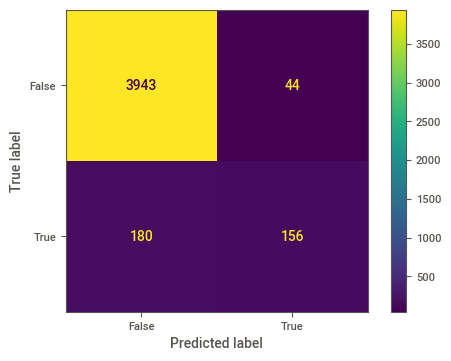

In [368]:
y_pred = clf_C0001.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

cm_display.plot()

plt.show()

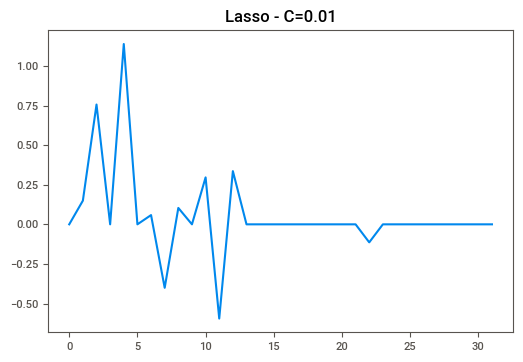

In [369]:
coef_plot(clf_C0001, 'Lasso - C=0.01')

#### Model 4: Lasso regression with optimal C value

Now use `LogisticRegressionCV` to fit a model and let sklearn determine the optimal `C` value to use. Again, compute the accuracy score and confusion matrices. Also, print out the optimal value of `C`. Does regularization help for this problem?

In [381]:
clf_model4_C00001 = LogisticRegressionCV(penalty='l2',cv=5, random_state=0, max_iter=2000)

clf_C00001 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', clf_model4_C00001)])

clf_C00001.fit(X_train, y_train)

print("Training score : %.3f" % clf_C00001.score(X_train, y_train))
print("Test score : %.3f" % clf_C00001.score(X_test, y_test))
print("Optimal Value of C : %.3f" % clf_model4_C00001.C_)

Training score : 0.963
Test score : 0.957
Optimal Value of C : 21.544


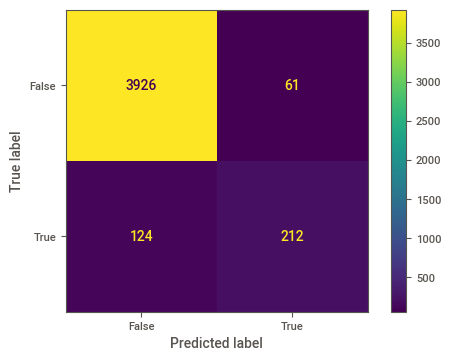

In [382]:
y_pred = clf_C00001.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

cm_display.plot()

plt.show()

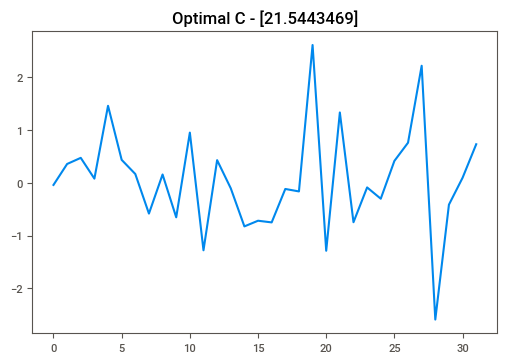

In [384]:
coef_plot(clf_C00001, 'Optimal C - {}'.format(str(clf_model4_C00001.C_)))

### Task 5 - Simple decision tree
Now fit a decision tree to predict `price_gt_1M`. As we did above, for both train and test, compute the accuracy score, create a confusion matrix, and discuss the performance relative to your logistic regression models. Obviously you do not need to create a coefficient plot (why not?). 

In [372]:
from sklearn import tree

In [376]:
# create decision tree classifier object
clf_tree = tree.DecisionTreeClassifier()

# train decision tree classifier
clf_tree = clf_tree.fit(X_train, y_train)

# predict the response for the test dataset
y_pred_tree = clf_tree.predict(X_test)

We can just `.plot_tree` to visualize the tree, but its hard to see

[Text(0.6303896813602669, 0.975, 'x[8] <= 9.5\ngini = 0.125\nsamples = 17290\nvalue = [16134, 1156]'),
 Text(0.41646182889530164, 0.925, 'x[2] <= 2829.0\ngini = 0.06\nsamples = 16012\nvalue = [15517, 495]'),
 Text(0.298742029686717, 0.875, 'x[5] <= 0.5\ngini = 0.026\nsamples = 14090\nvalue = [13904, 186]'),
 Text(0.2532702044201759, 0.825, 'x[16] <= 2916.0\ngini = 0.023\nsamples = 14036\nvalue = [13870, 166]'),
 Text(0.1845829517374851, 0.775, 'x[8] <= 8.5\ngini = 0.019\nsamples = 13820\nvalue = [13690, 130]'),
 Text(0.11117831037998306, 0.725, 'x[16] <= 2295.0\ngini = 0.01\nsamples = 12878\nvalue = [12814, 64]'),
 Text(0.07938345630799537, 0.675, 'x[2] <= 2607.5\ngini = 0.005\nsamples = 11477\nvalue = [11450, 27]'),
 Text(0.05812928755335142, 0.625, 'x[12] <= 1995.5\ngini = 0.004\nsamples = 11190\nvalue = [11170, 20]'),
 Text(0.0333154775276045, 0.575, 'x[16] <= 1905.0\ngini = 0.003\nsamples = 10988\nvalue = [10972, 16]'),
 Text(0.014376803580377046, 0.525, 'x[9] <= 2408.0\ngini = 0.0

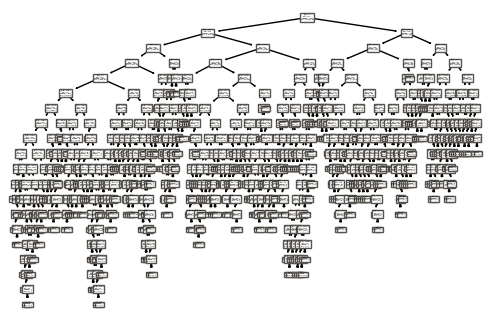

In [379]:
tree.plot_tree(clf_tree)

Or my personal favorite, is to `export_text()` and have the text from the tree printed... I think this is a pretty intuitive way to visualize the decision tree

In [378]:
text_rep = tree.export_text(clf_tree)

print(text_rep)

|--- feature_8 <= 9.50
|   |--- feature_2 <= 2829.00
|   |   |--- feature_5 <= 0.50
|   |   |   |--- feature_16 <= 2916.00
|   |   |   |   |--- feature_8 <= 8.50
|   |   |   |   |   |--- feature_16 <= 2295.00
|   |   |   |   |   |   |--- feature_2 <= 2607.50
|   |   |   |   |   |   |   |--- feature_12 <= 1995.50
|   |   |   |   |   |   |   |   |--- feature_16 <= 1905.00
|   |   |   |   |   |   |   |   |   |--- feature_9 <= 2408.00
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 24250.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  24250.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_9 >  2408.00
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 2412.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  2412.00
|   |   |   |   |   |   |

Obviously the results are truncated since there is a ton of text associated with a tree this size. There were some other ways to visualize the tree like created a .png, but I couldn't really get the sizing much better than what the picture in `plot_tree` looked like

In [374]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.957205644228545


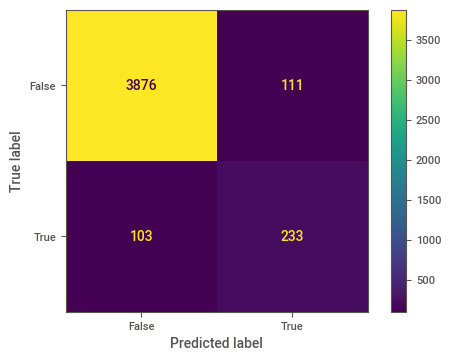

In [375]:
y_pred = clf_tree.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])

cm_display.plot()

plt.show()

### Task 6 - a little error exploration (more challenging)

In [385]:
# read in our data from the clean data folder
regression_df = pd.read_csv("data/kc_house_data_regression.csv")

In [386]:
# print the head to see what the data generally looks like
regression_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,510000.0


As we can see, price is included on the far right of this dataframe

In [387]:
# lets compare this to our classification dataframe
classification_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


So it's literally the exact same data, and we want to investigate it, so were going to merge on all of the columns that are in both dataframe

In [389]:
cols_in_both = set(regression_df.columns.tolist()).intersection(set(classification_df.columns.tolist()))
print(cols_in_both)

{'zipcode', 'floors', 'view', 'yr_built', 'sqft_living15', 'bedrooms', 'long', 'bathrooms', 'grade', 'sqft_lot', 'waterfront', 'sqft_basement', 'lat', 'sqft_above', 'sqft_living', 'condition', 'yr_renovated'}


In [394]:
combined_df = pd.merge(left=regression_df, right=classification_df, how='left', on=[
    'zipcode'
    , 'floors'
    , 'view'
    , 'yr_built'
    , 'sqft_living15'
    , 'bedrooms'
    , 'long'
    , 'bathrooms'
    , 'grade'
    , 'sqft_lot'
    , 'waterfront'
    , 'sqft_basement'
    , 'lat'
    , 'sqft_above'
    , 'sqft_living'
    , 'condition'
    , 'yr_renovated'
])

# for some reason it didn't work when I said on=cols_in_both, but it worked when I copied the printed keys in so idk

combined_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price,sqft_lot15,price_gt_1M
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,221900.0,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,538000.0,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,180000.0,8062,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,604000.0,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,510000.0,7503,0


Now we want to use this data to see which rows are wrong, like are there any where the price is over $1 million but the price_gt_1M col is marked wrong

In [400]:
check_df = combined_df[(combined_df["price"] >= 1000000) & (combined_df["price_gt_1M"] != 1)]
check_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price,sqft_lot15,price_gt_1M
13986,5,2.5,2350,4000,2.0,0,0,3,9,2350,0,1993,0,98112,47.6265,-122.296,1840,1015000.0,4000,0
16312,3,2.0,2160,15788,1.0,0,0,3,8,2160,0,1951,0,98004,47.6227,-122.207,2260,1190000.0,9787,0


So from what I could find, there are only 2 that are marked wrong in our data. Those 2 rows are pictured above.